In [29]:
import numpy as np
from numpy import linalg
# PCA+visualization
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

In [44]:
def centered(A):
    return A-np.mean(A, axis=0)

def sum_of_outer_product(A, B):
    C = np.zeros((A.shape[1],A.shape[1]))
    for a, b in zip(A,B):
        C = C + np.outer(a, b)
    return C

def AO_Rotation(A, B): 
    # rotate B
    A_h = centered(A)
    B_h = centered(B)
    H = sum_of_outer_product(B_h,A_h)
    U,S,VT=linalg.svd(H)
    R = np.dot(U,VT)
    return np.dot(B,R)
    

In [64]:
google_pivot_vec = AO_Rotation(stack_pivot_vec, google_pivot_vec)

In [30]:
w2v_quora_50d = np.load("/Users/zhang/MscProject_tweak2vec/word2vecModel/w2v_google_50d.npy")
w2v_pivots100_50d = np.load("/Users/zhang/MscProject_tweak2vec/word2vecModel/w2v_pivots100_50d.npy")
vocab_list = np.load('quora_vocab5.npy')

In [31]:
quora_pc = pca.fit_transform(w2v_quora_50d)
pivots_pc = pca.fit_transform(w2v_pivots100_50d)
quora_pcDF = pd.DataFrame(data = quora_pc
             , columns = ['pc 1', 'pc 2'])
pivots_pcDF = pd.DataFrame(data = pivots_pc
             , columns = ['pc 1', 'pc 2'])

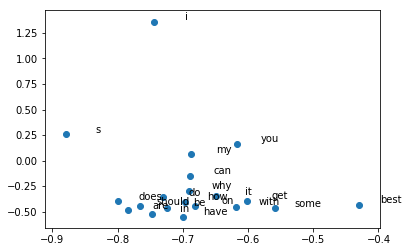

In [33]:
start = 0
end = 20
quora_x = [w[0] for w in quora_pc[start:end] ]
quora_y = [w[1] for w in quora_pc[start:end] ]
i=start
for a,b in zip(quora_x,quora_y):
    plt.text(a+0.05, b, vocab_list[i][0], ha='center', va= 'bottom',fontsize=10)
    i=i+1
plt.scatter(quora_x, quora_y)
plt.show()

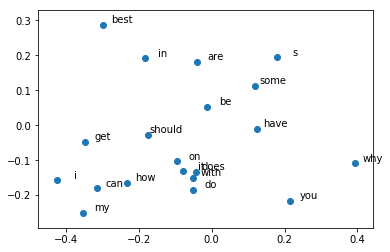

In [34]:
pivots_x = [-w[0] for w in pivots_pc[start:end] ]
pivots_y = [w[1] for w in pivots_pc[start:end] ]
i=start
for a,b in zip(pivots_x,pivots_y):
    plt.text(a+0.05, b, vocab_list[i][0], ha='center', va= 'bottom',fontsize=10)
    i=i+1
plt.scatter(pivots_x, pivots_y)
plt.show()